<a href="https://colab.research.google.com/github/linyu2703/SLP_collabproject2025/blob/main/SLP2025_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**Data Load & Clean**

In [2]:
df = pd.read_csv('/content/Workplace+Communication_December+23,+2025_16.23.csv')

In [3]:
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,FQ2a,FQ2b,IQ2a,IQ2b,FQ3a,FQ3b,IQ3a,IQ3b,Q16,Q17
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Do you feel that the wording used in this scen...,How comfortable would you feel disclosing your...,Do you feel that the wording used in this scen...,How comfortable would you feel disclosing your...,Do you feel that the wording used in this scen...,How comfortable would you feel disclosing your...,Do you feel that the wording used in this scen...,How comfortable would you feel disclosing your...,What aspects of a workplace communication styl...,What aspects of a workplace communication styl...
1,10/28/25 14:57,11/3/25 19:35,IP Address,98.116.232.224,6,538679,False,11/10/25 19:35,R_5XjRkcuKS03xOo4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/11/25 18:33,11/11/25 18:40,IP Address,172.56.167.74,100,395,True,11/11/25 18:40,R_6TyCDd7f38u9ea2,NaN,...,NaN,3- Neutral,NaN,4- Somewhat comfortable,NaN,3- Neutral,NaN,4- Somewhat comfortable,When people acknowledge that we are a team and...,When people command or act rude to people for ...
3,11/17/25 7:05,11/17/25 7:06,IP Address,174.229.53.236,100,22,True,11/17/25 7:06,R_5MS6f6viSpLWHBq,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/17/25 14:01,11/17/25 14:07,IP Address,71.167.176.37,100,397,True,11/17/25 14:07,R_5Y2JBsQNlV5UOxJ,NaN,...,NaN,2- Somewhat uncomfortable,NaN,4- Somewhat comfortable,NaN,2- Somewhat uncomfortable,NaN,5- Very comfortable,relaxed friendly and occasionally silly,serious all the time with heightened standards...


In [4]:
# Filtering for specific columns from our survey
df_filter = df.iloc[:, 17:52]

In [5]:
df_filter.head()

,Qi,Q1,Q2,Q2a,Q3,Q4,Q5,Q6,Q6a,Q7,...,FQ2a,FQ2b,IQ2a,IQ2b,FQ3a,FQ3b,IQ3a,IQ3b,Q16,Q17
0,Do you consent?,What is your age?,Do you identify as someone who has been either...,"If yes,",Have you been employed ?,"Are you able to read, speak, and write in Engl...",Do you have regular access to a computer,What is your gender? - Selected Choice,What is your gender? - Other: ______________ -...,What is your race/ethnicity? - Selected Choice,...,Do you feel that the wording used in this scen...,How comfortable would you feel disclosing your...,Do you feel that the wording used in this scen...,How comfortable would you feel disclosing your...,Do you feel that the wording used in this scen...,How comfortable would you feel disclosing your...,Do you feel that the wording used in this scen...,How comfortable would you feel disclosing your...,What aspects of a workplace communication styl...,What aspects of a workplace communication styl...
1,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yes,18-24,Yes,Formally Diagnosed,Yes,Yes,Yes,Male,NaN,White,...,NaN,3- Neutral,NaN,4- Somewhat comfortable,NaN,3- Neutral,NaN,4- Somewhat comfortable,When people acknowledge that we are a team and...,When people command or act rude to people for ...
3,Yes,25-34,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yes,18-24,Yes,Formally Diagnosed,Yes,Yes,Yes,Other: ______________,Gender Fluid,White,...,NaN,2- Somewhat uncomfortable,NaN,4- Somewhat comfortable,NaN,2- Somewhat uncomfortable,NaN,5- Very comfortable,relaxed friendly and occasionally silly,serious all the time with heightened standards...


In [6]:
rename_dict = {'Qi': 'Consent', 'Q1': 'Age', 'Q2': 'Autism(Y/N)', 'Q2a': 'Diagnosed By?', 'Q3': 'Employed(Y/N)', 'Q4': 'English Efficiency', 'Q5': 'Computer(Y/N)', 'Q6': 'Gender', 'Q6a': 'Gender(Other)', 'Q7': 'Race', 'Q7a': 'Race(Other)', 'Q8': 'Education', 'Q9': 'Current Employment(Y/N)', 'Q10': 'Job Field', 'Q10a': 'Job Field(Other)', 'Q11':'Job Level', 'Q11a': 'Job Level(Other)', 'Q12':'Work Size', 'Q13':'Tenure Length', 'Q14': 'Comforatbility Disclosing Condition', 'Q15': 'Disclosed Before?', 'FQ1a': 'Formal Scenario 1 Question 1', 'FQ1b': 'Formal Scenario 1 Question 2', 'IQ1a': 'Inclusive Scenario 1 Question 1', 'IQ1b': 'Inclusive Scenario 1 Question 2', 'FQ2a': 'Formal Scenario 2 Question 1', 'FQ2b': 'Formal Scenario 2 Question 2', 'IQ2a': 'Inclusive Scenario 2 Question 1', 'IQ2b': 'Inclusive Scenario 2 Question 2', 'FQ3a': 'Formal Scenario 3 Question 1', 'FQ3b': 'Formal Scenario 3 Question 2', 'IQ3a': 'Inclusive Scenario 3 Question 1', 'IQ3b': 'Inclusive Scenario 3 Question 2', 'Q16':'Aspects Supports Workplace Communication', 'Q17': 'Aspects Discourages Workplace Communication'}
df_filter.rename(columns=rename_dict, inplace=True)

/tmp/ipython-input-4166131072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter.rename(columns=rename_dict, inplace=True)


In [7]:
# Remove metadata rows (0 and 1)
df_clean = df_filter.drop([0, 1]).reset_index(drop=True)

In [8]:
df_clean.head()

,Consent,Age,Autism(Y/N),Diagnosed By?,Employed(Y/N),English Efficiency,Computer(Y/N),Gender,Gender(Other),Race,...,Formal Scenario 2 Question 1,Formal Scenario 2 Question 2,Inclusive Scenario 2 Question 1,Inclusive Scenario 2 Question 2,Formal Scenario 3 Question 1,Formal Scenario 3 Question 2,Inclusive Scenario 3 Question 1,Inclusive Scenario 3 Question 2,Aspects Supports Workplace Communication,Aspects Discourages Workplace Communication
0,Yes,18-24,Yes,Formally Diagnosed,Yes,Yes,Yes,Male,NaN,White,...,NaN,3- Neutral,NaN,4- Somewhat comfortable,NaN,3- Neutral,NaN,4- Somewhat comfortable,When people acknowledge that we are a team and...,When people command or act rude to people for ...
1,Yes,25-34,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yes,18-24,Yes,Formally Diagnosed,Yes,Yes,Yes,Other: ______________,Gender Fluid,White,...,NaN,2- Somewhat uncomfortable,NaN,4- Somewhat comfortable,NaN,2- Somewhat uncomfortable,NaN,5- Very comfortable,relaxed friendly and occasionally silly,serious all the time with heightened standards...
3,Yes,18-24,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yes,18-24,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Trim text and whitespace
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].str.strip()

In [10]:
# Filter for eligible participants
df_clean = df_clean[(df_clean['Consent'] == 'Yes') & (df_clean['Autism(Y/N)'] == 'Yes')]

In [11]:
# 4. Map Likert Scale - looks for the number in the string maps the values to the number, also handles NaN values
def map_likert(val):
    if pd.isna(val): return np.nan
    val = str(val)
    if '1' in val: return 1
    if '2' in val: return 2
    if '3' in val: return 3
    if '4' in val: return 4
    if '5' in val: return 5
    return np.nan

In [12]:
comfort_cols = [
    'Formal Scenario 1 Question 2', 'Inclusive Scenario 1 Question 2',
    'Formal Scenario 2 Question 2', 'Inclusive Scenario 2 Question 2',
    'Formal Scenario 3 Question 2', 'Inclusive Scenario 3 Question 2'
]

for col in comfort_cols:
    df_clean[col] = df_clean[col].apply(map_likert)

In [13]:
# Comparative Analysis
formal_list = ['Formal Scenario 1 Question 2', 'Formal Scenario 2 Question 2', 'Formal Scenario 3 Question 2']
inclusive_list = ['Inclusive Scenario 1 Question 2', 'Inclusive Scenario 2 Question 2', 'Inclusive Scenario 3 Question 2']

df_clean['Formal_Avg'] = df_clean[formal_list].mean(axis=1)
df_clean['Inclusive_Avg'] = df_clean[inclusive_list].mean(axis=1)
print("Formal Scenario Questions average:", round(df_clean['Formal_Avg'].mean(),2))
print("Icluive Scenario Questions average:", round(df_clean['Inclusive_Avg'].mean(), 2))

Formal Scenario Questions average: 2.61
Icluive Scenario Questions average: 3.39


In [14]:
# Statistical Test - paired t-test
t_stat, p_val = stats.ttest_rel(df_clean['Formal_Avg'], df_clean['Inclusive_Avg'], nan_policy='omit')
print(f"Paired T-test Results: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

Paired T-test Results: t-statistic = -2.4405, p-value = 0.0328


/tmp/ipython-input-1762523289.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=means, palette='coolwarm')


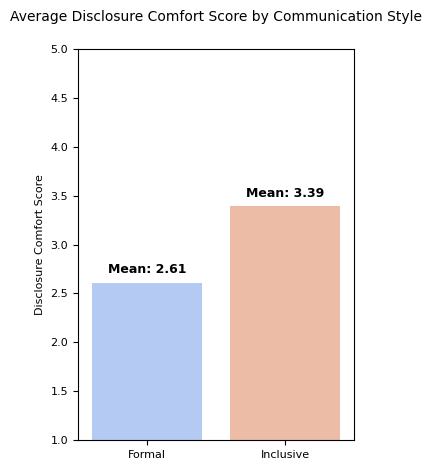

In [15]:
# Plot 1: Mean Comparison - bar chart
ax1 = plt.subplot(1, 2, 1)
means = [df_clean['Formal_Avg'].mean(), df_clean['Inclusive_Avg'].mean()]
labels = ['Formal', 'Inclusive']
sns.barplot(x=labels, y=means, palette='coolwarm')
plt.xticks(ticks=[0, 1], labels=labels, fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('Disclosure Comfort Score', fontsize=8)
ax1.set_title('Average Disclosure Comfort Score by Communication Style', fontsize=10, pad=20)
ax1.set_ylim(1, 5)
plt.tight_layout()

# Data labels
for i, mean_val in enumerate(means):
    ax1.text(i, mean_val + 0.1, f'Mean: {mean_val:.2f}', ha='center', fontweight='bold', fontsize=9)


plt.savefig('Mean_comparison_analysis.png')

/tmp/ipython-input-3323291031.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='style', y='score', data=plot_df, palette='coolwarm', ax=ax2)


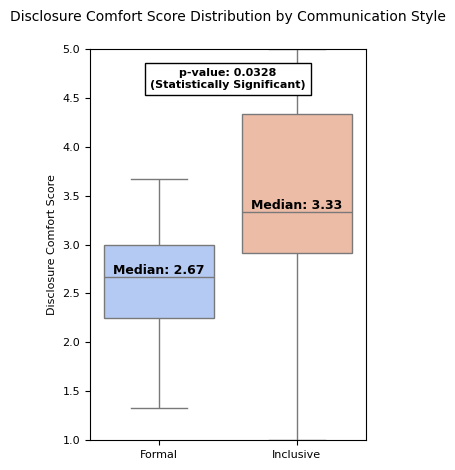

In [24]:
# Plot 2: Distribution Comparison - box plot
ax2 = plt.subplot(1, 2, 1)
plot_df = df_clean[['Formal_Avg', 'Inclusive_Avg']].rename(columns={
    'Formal_Avg': 'Formal',
    'Inclusive_Avg': 'Inclusive'
}).melt(var_name='style', value_name='score',)

sns.boxplot(x='style', y='score', data=plot_df, palette='coolwarm', ax=ax2)
ax2.set_title('Disclosure Comfort Score Distribution by Communication Style', fontsize=10, pad=20)
ax2.set_ylim(1, 5)
ax2.set_xlabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax2.set_ylabel('Disclosure Comfort Score', fontsize=8)
plt.tight_layout()

# Data labels (median label & p-value label)
sig_text = f"p-value: {p_val:.4f}\n(Statistically Significant)" if p_val < 0.05 else f"p-value: {p_val:.4f}"
plt.text(0.5, 4.6, sig_text, ha='center', fontweight='bold', fontsize=8, bbox=dict(facecolor='white', alpha=1))

medians = [df_clean['Formal_Avg'].median(), df_clean['Inclusive_Avg'].median()]
for i, median in enumerate(medians):
    ax2.text(i, median, f'Median: {median:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')


plt.savefig('Distribution_comparison_analysis.png')

**Explanation of results:**

1. Plot 1: The Comparison of Averages (Bar Chart) <br>
Plot 1 displays the Mean Disclosure Comfort Score, which is the mathematical average of all participants' responses. The bar for formal communication style stands at an average of 2.61, indicating that when a more rigid and policy-heavy language is used, participants felt between "somewhat uncomfortable" to "neutral" about sharing their diagnosis. In contrast, the inclusive communication style bar rises to 3.39, showing a clear shift toward a more positive comfort level. This visual comparison illustrates the gap and clear distinguishment in disclosure motivations created by the two differet communication styles, showing that simply changing the wording and tone used in a workplace interaction can increase an autistic employee's comfort level by almost a full point on a 5-point likert scale.

2. Plot 2: The Distribution and Consistency (Box Plot)<br>
Plot 2 displays the distribution of the disclosure comfort scores, showing how much variety there was within the responses. The inclusive communication style box positioned higher on the y-axis than the formal communication style box, which confirms that the preference for supportive language was more common across the group of responses, rather than just a few extreme opinions. The median labels were 2.67 formal and 3.33 for inclusive, representing the middle most responses. Due to the inclusive median being higher and the box being tigether than the formal, it suggests that the inclsuive communication provides a more consistently safe environment for a wider range of people with autism to disclosure their condition in the workplace.

3. Understanding the Statistical Test (Paired T-test): <br>
A paired t-test compares the means of two related samples to determine if there is a statistically significant difference between them. It calculates whether the mean of the differences between the two samples is significantly different from zero. <br>
A low p-value (typically <= 0.05) suggests the difference is statistically significant. Our p-value is 0.0328 which means our finding is statistically significant. So in terms of relationship between variables, this suggests that there is a confirmed positive correlation between inclsuive communication and disclosure motivation. <br>
Our t-statistic is -2.4405, which is roughly 2.44 standard errors below the null hypothesis (usually 0). The negative sign simply indicates the direction of the difference. This allows us to conclude that a person's use of inclusive language/tone will directly increases the likelihood that an autistic person will feel more safe to disclose their condition, than when encountering a person using a formal langauge/tone.